In [18]:
# Import Dependencies 

from citipy import citipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import requests
import time
import json 
import random
import sys
import math
from random import uniform
import requests as req
import datetime as dt




In [19]:
#randomly generatge lat and long coordinates and print them as a list of tuples 
coordinates =[]
def newpoint():
   return uniform(-90,90), uniform(-90, 90)

points = (newpoint() for x in range(1500))
for point in points:
   #print (point)
   coordinates.append(point)
    
#print(coordinates)



In [41]:
# using the citipy library, pass randomly generated coordinates to get the list of cities 

cities = []
city_names=[]
latit=[]
longit=[]
for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    latit.append(lat)
    longit.append(lon)
    cities.append(citipy.nearest_city(lat, lon))
    
for city in cities:
    name = city.city_name
    city_names.append(name)
    #print(name)
    

df_temp = pd.DataFrame(
    {'City_temp': city_names,
     'Latitude_Temp': latit,
     'Longitude_Temp': longit
    })


print(df_temp.head())

city_names1=pd.unique(city_names).tolist()
print(len(city_names1))

df_temp2 = df_temp.drop_duplicates(subset=['City_temp'])
        

#print(df_temp2)


    
#print(city_names)
#print(latit)
#print(longit)



              City_temp  Latitude_Temp  Longitude_Temp
0  doctor pedro p. pena     -22.136692      -61.276073
1               ushuaia     -73.768601      -52.046075
2               kumluca      36.296334       30.750276
3                 galle       4.634848       78.172620
4               huarmey     -11.743068      -82.815312
622


In [25]:
# perform the API calls on the list of cities 

weather_response1=[]
cloudiness=[]
Country=[]
Date=[]
Humidity=[]
Max_Temp =[]
Wind_Speed =[]

api_key = "a283664ee6738d95e4117afe0d31a481"
url = "http://api.openweathermap.org/data/2.5/weather?"

print('Beginning of data retrieval')
print('--------------------------------------')
row=1

for City in df_temp2['City_temp']:
    target_url = "http://api.openweathermap.org/data/2.5/weather?q=%s&appid=%s" % (City, api_key)
    print('Processing' + str(row) +'records out of 500'+ "  " + City)
    row=row+1
    print(target_url)
    weather_response = req.get(target_url)
    try:
        cloud_data=weather_response.json()["clouds"]["all"]
        country_data=weather_response.json()["sys"]["country"]
        date_data= weather_response.json()["dt"]
        humidity_data=weather_response.json()["main"]["humidity"]
        maxtemp_data=weather_response.json()["main"]["temp_max"]
        wind_data=weather_response.json()["wind"]["speed"]
        
    except:
        cloud_data="NaN"
        country_data="NaN"
        date_data="NaN"
        humidity_data="NaN"
        maxtemp_data="NaN"
        wind_data="NaN"
        
    # adding the above data to lists     
    
  
    cloudiness.append(cloud_data)
    Country.append(country_data)
    Date.append(date_data)
    Humidity.append(humidity_data)
    Max_Temp.append(maxtemp_data)
    Wind_Speed.append(wind_data)
    
print("End of Data Retrieval")
print('------------------------------------------------------')
    
#print(weather_response1)
#print(cloudiness)
#print(Country)
#print(Date)
#print(Humidity)
#print(Max_Temp)
#print(Wind_Speed)



Beginning of data retrieval
--------------------------------------
Processing1records out of 500  doctor pedro p. pena
http://api.openweathermap.org/data/2.5/weather?q=doctor pedro p. pena&appid=a283664ee6738d95e4117afe0d31a481
Processing2records out of 500  ushuaia
http://api.openweathermap.org/data/2.5/weather?q=ushuaia&appid=a283664ee6738d95e4117afe0d31a481
Processing3records out of 500  kumluca
http://api.openweathermap.org/data/2.5/weather?q=kumluca&appid=a283664ee6738d95e4117afe0d31a481
Processing4records out of 500  galle
http://api.openweathermap.org/data/2.5/weather?q=galle&appid=a283664ee6738d95e4117afe0d31a481
Processing5records out of 500  huarmey
http://api.openweathermap.org/data/2.5/weather?q=huarmey&appid=a283664ee6738d95e4117afe0d31a481
Processing6records out of 500  tasbuget
http://api.openweathermap.org/data/2.5/weather?q=tasbuget&appid=a283664ee6738d95e4117afe0d31a481
Processing7records out of 500  salalah
http://api.openweathermap.org/data/2.5/weather?q=salalah&app

Processing59records out of 500  bongandanga
http://api.openweathermap.org/data/2.5/weather?q=bongandanga&appid=a283664ee6738d95e4117afe0d31a481
Processing60records out of 500  arraial do cabo
http://api.openweathermap.org/data/2.5/weather?q=arraial do cabo&appid=a283664ee6738d95e4117afe0d31a481
Processing61records out of 500  west bay
http://api.openweathermap.org/data/2.5/weather?q=west bay&appid=a283664ee6738d95e4117afe0d31a481
Processing62records out of 500  georgetown
http://api.openweathermap.org/data/2.5/weather?q=georgetown&appid=a283664ee6738d95e4117afe0d31a481
Processing63records out of 500  taolanaro
http://api.openweathermap.org/data/2.5/weather?q=taolanaro&appid=a283664ee6738d95e4117afe0d31a481
Processing64records out of 500  dingle
http://api.openweathermap.org/data/2.5/weather?q=dingle&appid=a283664ee6738d95e4117afe0d31a481
Processing65records out of 500  banfora
http://api.openweathermap.org/data/2.5/weather?q=banfora&appid=a283664ee6738d95e4117afe0d31a481
Processing66re

Processing118records out of 500  gondar
http://api.openweathermap.org/data/2.5/weather?q=gondar&appid=a283664ee6738d95e4117afe0d31a481
Processing119records out of 500  upernavik
http://api.openweathermap.org/data/2.5/weather?q=upernavik&appid=a283664ee6738d95e4117afe0d31a481
Processing120records out of 500  luderitz
http://api.openweathermap.org/data/2.5/weather?q=luderitz&appid=a283664ee6738d95e4117afe0d31a481
Processing121records out of 500  elliot lake
http://api.openweathermap.org/data/2.5/weather?q=elliot lake&appid=a283664ee6738d95e4117afe0d31a481
Processing122records out of 500  qasigiannguit
http://api.openweathermap.org/data/2.5/weather?q=qasigiannguit&appid=a283664ee6738d95e4117afe0d31a481
Processing123records out of 500  grindavik
http://api.openweathermap.org/data/2.5/weather?q=grindavik&appid=a283664ee6738d95e4117afe0d31a481
Processing124records out of 500  xai-xai
http://api.openweathermap.org/data/2.5/weather?q=xai-xai&appid=a283664ee6738d95e4117afe0d31a481
Processing125

Processing177records out of 500  macau
http://api.openweathermap.org/data/2.5/weather?q=macau&appid=a283664ee6738d95e4117afe0d31a481
Processing178records out of 500  eirunepe
http://api.openweathermap.org/data/2.5/weather?q=eirunepe&appid=a283664ee6738d95e4117afe0d31a481
Processing179records out of 500  kazalinsk
http://api.openweathermap.org/data/2.5/weather?q=kazalinsk&appid=a283664ee6738d95e4117afe0d31a481
Processing180records out of 500  mehamn
http://api.openweathermap.org/data/2.5/weather?q=mehamn&appid=a283664ee6738d95e4117afe0d31a481
Processing181records out of 500  glens falls
http://api.openweathermap.org/data/2.5/weather?q=glens falls&appid=a283664ee6738d95e4117afe0d31a481
Processing182records out of 500  kargil
http://api.openweathermap.org/data/2.5/weather?q=kargil&appid=a283664ee6738d95e4117afe0d31a481
Processing183records out of 500  ghanzi
http://api.openweathermap.org/data/2.5/weather?q=ghanzi&appid=a283664ee6738d95e4117afe0d31a481
Processing184records out of 500  gran

Processing236records out of 500  ambagarh chauki
http://api.openweathermap.org/data/2.5/weather?q=ambagarh chauki&appid=a283664ee6738d95e4117afe0d31a481
Processing237records out of 500  tacoronte
http://api.openweathermap.org/data/2.5/weather?q=tacoronte&appid=a283664ee6738d95e4117afe0d31a481
Processing238records out of 500  nambutalai
http://api.openweathermap.org/data/2.5/weather?q=nambutalai&appid=a283664ee6738d95e4117afe0d31a481
Processing239records out of 500  batala
http://api.openweathermap.org/data/2.5/weather?q=batala&appid=a283664ee6738d95e4117afe0d31a481
Processing240records out of 500  quatre cocos
http://api.openweathermap.org/data/2.5/weather?q=quatre cocos&appid=a283664ee6738d95e4117afe0d31a481
Processing241records out of 500  saint-pacome
http://api.openweathermap.org/data/2.5/weather?q=saint-pacome&appid=a283664ee6738d95e4117afe0d31a481
Processing242records out of 500  barawe
http://api.openweathermap.org/data/2.5/weather?q=barawe&appid=a283664ee6738d95e4117afe0d31a481

Processing295records out of 500  aras
http://api.openweathermap.org/data/2.5/weather?q=aras&appid=a283664ee6738d95e4117afe0d31a481
Processing296records out of 500  marcona
http://api.openweathermap.org/data/2.5/weather?q=marcona&appid=a283664ee6738d95e4117afe0d31a481
Processing297records out of 500  saint-pierre
http://api.openweathermap.org/data/2.5/weather?q=saint-pierre&appid=a283664ee6738d95e4117afe0d31a481
Processing298records out of 500  rocha
http://api.openweathermap.org/data/2.5/weather?q=rocha&appid=a283664ee6738d95e4117afe0d31a481
Processing299records out of 500  george town
http://api.openweathermap.org/data/2.5/weather?q=george town&appid=a283664ee6738d95e4117afe0d31a481
Processing300records out of 500  vila velha
http://api.openweathermap.org/data/2.5/weather?q=vila velha&appid=a283664ee6738d95e4117afe0d31a481
Processing301records out of 500  sept-iles
http://api.openweathermap.org/data/2.5/weather?q=sept-iles&appid=a283664ee6738d95e4117afe0d31a481
Processing302records ou

Processing354records out of 500  ihosy
http://api.openweathermap.org/data/2.5/weather?q=ihosy&appid=a283664ee6738d95e4117afe0d31a481
Processing355records out of 500  luena
http://api.openweathermap.org/data/2.5/weather?q=luena&appid=a283664ee6738d95e4117afe0d31a481
Processing356records out of 500  caceres
http://api.openweathermap.org/data/2.5/weather?q=caceres&appid=a283664ee6738d95e4117afe0d31a481
Processing357records out of 500  coquimbo
http://api.openweathermap.org/data/2.5/weather?q=coquimbo&appid=a283664ee6738d95e4117afe0d31a481
Processing358records out of 500  omboue
http://api.openweathermap.org/data/2.5/weather?q=omboue&appid=a283664ee6738d95e4117afe0d31a481
Processing359records out of 500  karaul
http://api.openweathermap.org/data/2.5/weather?q=karaul&appid=a283664ee6738d95e4117afe0d31a481
Processing360records out of 500  kuryk
http://api.openweathermap.org/data/2.5/weather?q=kuryk&appid=a283664ee6738d95e4117afe0d31a481
Processing361records out of 500  mamallapuram
http://ap

Processing413records out of 500  fort-shevchenko
http://api.openweathermap.org/data/2.5/weather?q=fort-shevchenko&appid=a283664ee6738d95e4117afe0d31a481
Processing414records out of 500  magadi
http://api.openweathermap.org/data/2.5/weather?q=magadi&appid=a283664ee6738d95e4117afe0d31a481
Processing415records out of 500  gonen
http://api.openweathermap.org/data/2.5/weather?q=gonen&appid=a283664ee6738d95e4117afe0d31a481
Processing416records out of 500  barcelos
http://api.openweathermap.org/data/2.5/weather?q=barcelos&appid=a283664ee6738d95e4117afe0d31a481
Processing417records out of 500  garmsar
http://api.openweathermap.org/data/2.5/weather?q=garmsar&appid=a283664ee6738d95e4117afe0d31a481
Processing418records out of 500  santa cruz de tenerife
http://api.openweathermap.org/data/2.5/weather?q=santa cruz de tenerife&appid=a283664ee6738d95e4117afe0d31a481
Processing419records out of 500  sivas
http://api.openweathermap.org/data/2.5/weather?q=sivas&appid=a283664ee6738d95e4117afe0d31a481
Pro

Processing472records out of 500  usinsk
http://api.openweathermap.org/data/2.5/weather?q=usinsk&appid=a283664ee6738d95e4117afe0d31a481
Processing473records out of 500  mecca
http://api.openweathermap.org/data/2.5/weather?q=mecca&appid=a283664ee6738d95e4117afe0d31a481
Processing474records out of 500  trinidad
http://api.openweathermap.org/data/2.5/weather?q=trinidad&appid=a283664ee6738d95e4117afe0d31a481
Processing475records out of 500  mahibadhoo
http://api.openweathermap.org/data/2.5/weather?q=mahibadhoo&appid=a283664ee6738d95e4117afe0d31a481
Processing476records out of 500  petrovac
http://api.openweathermap.org/data/2.5/weather?q=petrovac&appid=a283664ee6738d95e4117afe0d31a481
Processing477records out of 500  faya
http://api.openweathermap.org/data/2.5/weather?q=faya&appid=a283664ee6738d95e4117afe0d31a481
Processing478records out of 500  porto torres
http://api.openweathermap.org/data/2.5/weather?q=porto torres&appid=a283664ee6738d95e4117afe0d31a481
Processing479records out of 500  

Processing531records out of 500  mira
http://api.openweathermap.org/data/2.5/weather?q=mira&appid=a283664ee6738d95e4117afe0d31a481
Processing532records out of 500  nouakchott
http://api.openweathermap.org/data/2.5/weather?q=nouakchott&appid=a283664ee6738d95e4117afe0d31a481
Processing533records out of 500  altay
http://api.openweathermap.org/data/2.5/weather?q=altay&appid=a283664ee6738d95e4117afe0d31a481
Processing534records out of 500  sao borja
http://api.openweathermap.org/data/2.5/weather?q=sao borja&appid=a283664ee6738d95e4117afe0d31a481
Processing535records out of 500  la asuncion
http://api.openweathermap.org/data/2.5/weather?q=la asuncion&appid=a283664ee6738d95e4117afe0d31a481
Processing536records out of 500  porto novo
http://api.openweathermap.org/data/2.5/weather?q=porto novo&appid=a283664ee6738d95e4117afe0d31a481
Processing537records out of 500  laguna
http://api.openweathermap.org/data/2.5/weather?q=laguna&appid=a283664ee6738d95e4117afe0d31a481
Processing538records out of 5

Processing591records out of 500  beyneu
http://api.openweathermap.org/data/2.5/weather?q=beyneu&appid=a283664ee6738d95e4117afe0d31a481
Processing592records out of 500  sayalgudi
http://api.openweathermap.org/data/2.5/weather?q=sayalgudi&appid=a283664ee6738d95e4117afe0d31a481
Processing593records out of 500  umba
http://api.openweathermap.org/data/2.5/weather?q=umba&appid=a283664ee6738d95e4117afe0d31a481
Processing594records out of 500  maniitsoq
http://api.openweathermap.org/data/2.5/weather?q=maniitsoq&appid=a283664ee6738d95e4117afe0d31a481
Processing595records out of 500  baherden
http://api.openweathermap.org/data/2.5/weather?q=baherden&appid=a283664ee6738d95e4117afe0d31a481
Processing596records out of 500  nioro
http://api.openweathermap.org/data/2.5/weather?q=nioro&appid=a283664ee6738d95e4117afe0d31a481
Processing597records out of 500  rehoboth
http://api.openweathermap.org/data/2.5/weather?q=rehoboth&appid=a283664ee6738d95e4117afe0d31a481
Processing598records out of 500  bonavist

In [42]:
df = pd.DataFrame(
    {'City': df_temp2['City_temp'],
     'Cloudiness': cloudiness,
     'Country': Country,
     'Date': Date,
     'Humidity': Humidity,
     'Max_Temp': Max_Temp,
     'Wind_Speed':Wind_Speed,
     'Latitude': df_temp2['Latitude_Temp'],
     'Longitude': df_temp2['Longitude_Temp']
    })

# removing the NaN rows since this becomes irrelevant data to plot and also removing any duplicates cities from the list

df1=df[df.Max_Temp != 'NaN']

df2 = df1.drop_duplicates(subset=['City'])

df3=df2.apply(pd.to_numeric, errors='ignore')

#print(df3)

df3.to_csv('result1.csv', index=False)







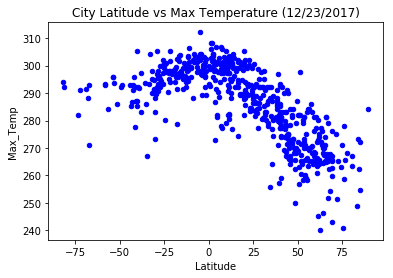

In [33]:
df3.plot(kind='scatter',x='Latitude', y='Max_Temp', color='blue', title='City Latitude vs Max Temperature'+" "+"("+dt.datetime.today().strftime("%m/%d/%Y")+")")

plt.savefig('Longitude_vs_Max_Temp.png', dpi=100)

plt.show()





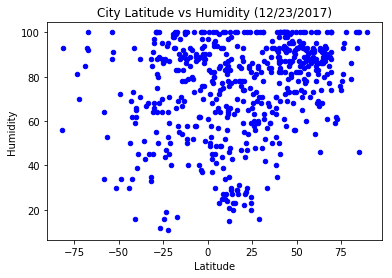

In [34]:

df3.plot(kind='scatter',x='Latitude', y='Humidity', color='blue', title='City Latitude vs Humidity'+" "+"("+dt.datetime.today().strftime("%m/%d/%Y")+")")

plt.savefig('Longitude_vs_Humidity.png', dpi=100)

plt.show()



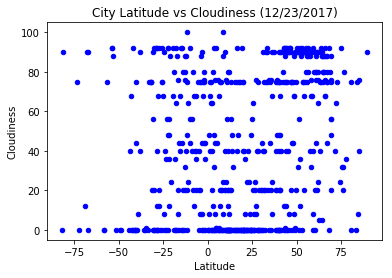

In [35]:
df3.plot(kind='scatter',x='Latitude', y='Cloudiness', color='blue', title='City Latitude vs Cloudiness'+" "+"("+dt.datetime.today().strftime("%m/%d/%Y")+")")

plt.savefig('Longitude_vs_cloudiness.png', dpi=100)

plt.show()


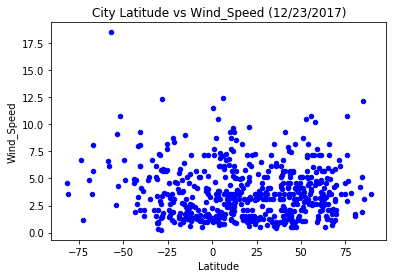

In [36]:
df3.plot(kind='scatter',x='Latitude', y='Wind_Speed', color='blue', title='City Latitude vs Wind_Speed'+" "+"("+dt.datetime.today().strftime("%m/%d/%Y")+")")
plt.savefig('Longitude_vs_wind_speed.png', dpi=100)

plt.show()